下面是利用 skit-learn 包提供的 LR 逻辑回归功能来实现前面 KNN 的图片识别功能

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def showPic( filename ):
    img=np.array(Image.open(filename))
    plt.imshow(img)
    plt.axis('on')
    plt.show()

def getPngStr(filename):
    image = Image.open(filename)
    r, g, b = image.split()
    r_arr = np.array(r).reshape(2400)
    ##print r_arr.size
    retStr=""
    for row in r_arr:
        retStr+=str(row)+","
    return retStr

def strToList(str):
    str = str.split(",")
    ret = []
    for s in str:
        if s == '' :
            continue
        ret.append(int(s))    
    return ret

def getTrainData():
    trainX = []
    trainY = []
    i=9
    while i >= 0 :
        j=9
        while j >= 0:
            txtFile = '../data/binarytxt_new/'+str(i)+"_"+str(j)+".txt"
            file = open(txtFile ,"r+")
            trainStr = file.read()
            trainX.append(strToList(trainStr))
            trainY.append(i)
            j-=1
        i-=1
    return trainX , trainY

def getTestData():
    testX = []
    testY = []
    i=9
    while i >= 0 :
        j=9
        while j >= 0:
            txtFile = "../data/test/binarytxt_new/"+str(i)+"_"+str(j)+".txt"
            file = open(txtFile ,"r+")
            testStr = file.read()
            testX.append(strToList(testStr))
            testY.append(i)
            j-=1
        i-=1
    return testX , testY

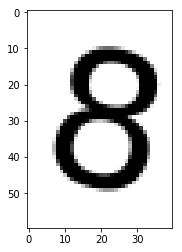

图片转字符串写入文件


In [4]:
demo="../data/8_2.png"
showPic(demo)
print "图片转字符串写入文件"
i=9
while i >=0 :
    j=9
    while j >= 0:
        ## 训练集数据准备
        filename ="../data/"+str(i)+"_"+str(j)+".png"
        txtStr = getPngStr(filename)
        txtFile = '../data/binarytxt_new/'+str(i)+"_"+str(j)+".txt"
        file = open(txtFile ,"wb+")
        file.write(txtStr)
        ## 测试集数据准备
        filename ="../data/test/"+str(i)+"_"+str(j)+".png"
        txtStr = getPngStr(filename)
        txtFile = '../data/test/binarytxt_new/'+str(i)+"_"+str(j)+".txt"
        file = open(txtFile ,"wb+")
        file.write(txtStr)
        j-=1
    i-=1

In [2]:

trainX = []
trainY = []
trainX,trainY = getTrainData()

trainY =  np.array(trainY)
trainX =  np.array(trainX)

clf = LogisticRegression(solver='sag', max_iter=1000, random_state=42,multi_class='ovr').fit(trainX, trainY)
print("training score : %.3f (%s)" % (clf.score(trainX, trainY), 'ovr'))
from sklearn.externals import joblib
joblib.dump(clf, 'lr.model')


/root/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


training score : 1.000 (ovr)


['lr.model']

测试图片


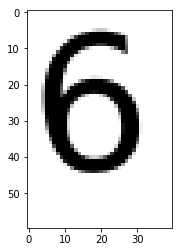

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6]


In [7]:
from sklearn.externals import joblib

testX  = []
testY  = []
testX,testY = getTestData()
testY =  np.array(testY)
testX =  np.array(testX)
clf = joblib.load('lr.model')
import commands
(status, output) = commands.getstatusoutput("php ../rand.php")
demo="../data/rand/rand.png"
print "测试图片"
showPic(demo)
demoStr = getPngStr(demo)
trainX,trainY = getTrainData()
print trainY
demoVec = np.array(strToList(demoStr)).reshape(1,-1)
print clf.predict(demoVec)